<img align="right" width="200" height="200" src="https://static.wikia.nocookie.net/lego/images/2/23/PPG_logo.png"> 

# <span style="color:#EF7C8E">Intermediate - Logistic Regression with PCA - Machine Learning </span>
 


## <span style="color:#55BB99"> By: Wejdan Al-Ahmadi</span>
<hr style="border:2px solid gray"> </hr>

## <span style="color:#726060">Objectives:</span>
Complete the notebook linked [here](https://drive.google.com/file/d/1viEQWlC1oXD1bpVNkPocZ468mT0SyLmF/view)

Complete the following requirements as described in the notebook linked above:

1. Split Data
1. EDA (Show us your opinion of the 2 best plots explaining the most important insights in the data).
    1. **Plots Require:**
        1. A short explanation of why it is important as if you were explaining it to someone who has never seen the plot before and is unfamiliar with the data.
        1. Legend
        1. Axis Labels
        1. Title
1. Determine Baseline Model
1. Scale Data
1. Create Logistic Regression Model
1. Compare Results to Baseline
1. Perform PCA
1. Use Your Principal Components for a Logistic Regression Model
1. Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA

<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_machine_learning/blob/main/day_12/02_pca_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Additional Imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

<center><H1>PCA With Diabetes Dataset</H1></center>

<p align="center">
  <img width="500" height="200" src="https://i.gifer.com/H7zW.gif">
</p>


👉🏼 [Data Dictionary](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 👈🏼

<center><H3>Steps (Must be performed in this order)</H></center>

1. [Split Data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
2. EDA (Show us your opinion of the 2 best plots explaining the most important insights int the data). 
    - **Plots Require**:
        - Title
        - Axis Labels
        - Legend
        - A short explanation why it is important as if you were explaining it to someone who has never seen the plot before and is unfamiliar with the data.
3. Determine Baseline Model
4. [Scale Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
5. [Create Logistic Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
6. Compare Results to Baseline
7. [Perform PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
8. Use Your Principal Components for a Logistic Regression Model
9. Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA

✨BONUS✨
 - Create a Scree Plot (You will probably have to research this)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mpHarm88/datasets/master/diabetes.csv")
df.sample(3)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
633            1      128             82             17      183  27.5   
625            4       90             88             47       54  37.7   
315            2      112             68             22       94  34.1   

     DiabetesPedigreeFunction  Age  Outcome  
633                     0.115   22        0  
625                     0.362   29        0  
315                     0.315   26        0

## <span style="color:#EF7C8E">1. Splitting and EDA: </span>

In [3]:
train, test = train_test_split(df, test_size=0.2, random_state=3)

In [4]:
train

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
468            8      120              0              0        0  30.0   
478            8      126             74             38       75  25.9   
107            4      144             58             28      140  29.5   
304            3      150             76              0        0  21.0   
515            3      163             70             18      105  31.6   
..           ...      ...            ...            ...      ...   ...   
659            3       80             82             31       70  34.2   
256            3      111             56             39        0  30.1   
643            4       90              0              0        0  28.0   
249            1      111             86             19        0  30.1   
664            6      115             60             39        0  33.7   

     DiabetesPedigreeFunction  Age  Outcome  
468                     0.183   38        1  
478                     0.162   39        0  
107                     0.287   37        0  
304                     0.207   37        0  
515                     0.268   28        1  
..                        ...  ...      ...  
659                     1.292   27        1  
256                     0.557   30        0  
643                     0.610   31        0  
249                     0.143   23        0  
664                     0.245   40        1  

[614 rows x 9 columns]

In [16]:
############## plot code #########
palette = ['#D8A7B1','#B6E2D3', '#FAE8E0', '#EF7C8E', '#8FDDE7', '#FBE5C8', '#A49393']
sns.set_palette(palette)  # set color palette
plt.figure(figsize=(20,7))
ax = sns.barplot(y=train['Insulin'], 
                 x=train['SkinThickness'])
ax.set_xlabel('Skin Thickness')
ax.set_ylabel('Insulin Levels')
plt.title("Insulin levels for all skin thickness")

# I didnt include a legend in this plot because it wouldnt be informative and just add clutter and noise since it will be
# very long

Text(0.5, 1.0, 'Insulin levels for all skin thickness')

#### <span style="color:#55BB99">Insights: </span>
1. Insulin levels tend to be higher, the thicker the skin is. 
1. The highest insulin levels are for skin thickness 49 and 50, but also skin thickness 7. 

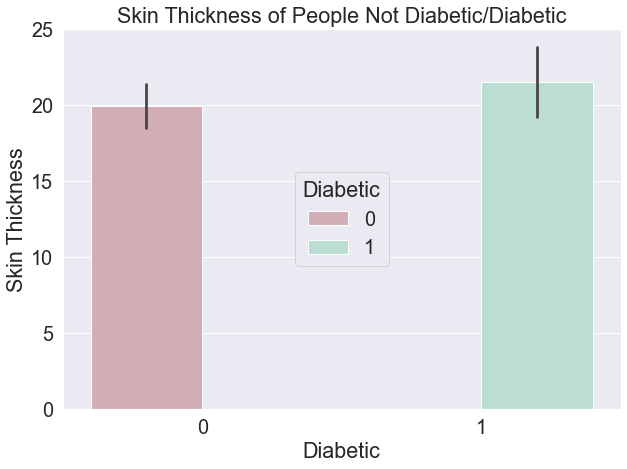

In [15]:
############## plot code #########
palette = ['#D8A7B1','#B6E2D3', '#FAE8E0', '#EF7C8E', '#8FDDE7', '#FBE5C8', '#A49393']
sns.set_palette(palette)  # set color palette
plt.figure(figsize=(10,7))
ax = sns.barplot(x=train['Outcome'], 
                 y=train['SkinThickness'], 
                 hue=train['Outcome'])
ax.set_xlabel('Diabetic')
ax.set_ylabel('Skin Thickness')
plt.title("Skin Thickness of People Not Diabetic/Diabetic")
plt.legend(title="Diabetic",loc='center')

#### <span style="color:#55BB99">Insights: </span>
1. People who are diabetic have a higher skin thickness, while people who arent have a slighly lower. 

In [7]:
############## plot code #########
train_10 = df[df["Pregnancies"]<=10] # get the women who had 10 or less pregnancies

plt.figure(figsize=(25,15)) # figure size 
sns.set_theme(style="darkgrid") # set a theme 
sns.set(font_scale = 1.80) # font size 
palette = ['#D8A7B1','#B6E2D3', '#FAE8E0', '#EF7C8E', '#8FDDE7', '#FBE5C8', '#A49393']
sns.set_palette(palette)  # set color palette
# Box-plot code 
b1 = sns.boxplot(
    x="Pregnancies",      # Parent Status
    y="Glucose",          # final grade
    hue="Outcome",        # gender 
    data=train_10         # data
)

# Naming labels, legend and title 
plt.legend(title='Diabities', loc='upper right')
plt.title("Glucose Levels for number of Pregnancies",  fontsize=24)


Text(0.5, 1.0, 'Glucose Levels for number of Pregnancies')

#### <span style="color:#55BB99">Insights: </span>
1. for people with no pregnancies and 1 pregnancies, the median level of glucose of the people with diabities splits at 135
1. the glucose levels for people with diabities range is much higher than ones without which makes sense since they have diabities
1. the lower range of people with diabities is different for each pregnancy but the higher range is almost the same or closer to each other 

## <span style="color:#EF7C8E">2. Baseline Model: </span>

In [8]:
# Baseline 
df["Outcome"].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## <span style="color:#EF7C8E">3. Logistic Regression without scaling or PCA: </span>

In [9]:
# Save X data
X1 = df.drop(columns = 'Outcome')

y1 = df['Outcome']

# Train test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1,test_size=0.2, random_state=3)

logreg1 = LogisticRegression(max_iter=1000)
logreg1.fit(X_train1, y_train1)
y_pred1 = logreg1.predict(X_test1)

# Cost Functions for logistic regression without scaling or PCA but with max_iter=1000
print("~~"*40)
print("The Cost Function result for Logistic Regression without standard scaling:")
print("~~"*40)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))
print("Recall:",metrics.recall_score(y_test1, y_pred1))
print("Precision:",metrics.precision_score(y_test1, y_pred1))
print("~~"*40)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The Cost Function result for Logistic Regression without standard scaling:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 0.7402597402597403
Recall: 0.5806451612903226
Precision: 0.72
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


## <span style="color:#EF7C8E">4. Logistic Regression with scaling but without PCA: </span>

In [10]:
# Save X data
X2 = df.drop(columns = 'Outcome')

y2 = df['Outcome']

# Train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,test_size=0.2, random_state=3)

# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train2)
X_test_sc = scaler.transform(X_test2)

logreg2 = LogisticRegression()
logreg2.fit(X_train_sc, y_train2)
y_pred2 = logreg2.predict(X_test_sc)

# Cost Functions for logistic regression with scaling
print("~~"*40)
print("The Cost Function result for Logistic Regression with standard scaling:")
print("~~"*40)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))
print("Recall:",metrics.recall_score(y_test2, y_pred2))
print("Precision:",metrics.precision_score(y_test2, y_pred2))
print("~~"*40)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The Cost Function result for Logistic Regression with standard scaling:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 0.7337662337662337
Recall: 0.5645161290322581
Precision: 0.7142857142857143
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


## <span style="color:#EF7C8E">4. Logistic Regression with PCA: </span>

In [25]:
# fit PCA
pca = PCA(n_components = 6)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

logreg_PCA = LogisticRegression()

logreg_PCA.fit(X_train_pca, y_train2)

y_pred_PCA = logreg_PCA.predict(X_test_pca)

# Cost Functions for logistic regression with PCA
print("~~"*40)
print("The Cost Function result for Logistic Regression with PCA")
print("~~"*40)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred_PCA))
print("Recall:",metrics.recall_score(y_test2, y_pred_PCA))
print("Precision:",metrics.precision_score(y_test2, y_pred_PCA))
print("~~"*40)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The Cost Function result for Logistic Regression with PCA
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 0.7467532467532467
Recall: 0.5483870967741935
Precision: 0.7555555555555555
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


## <span style="color:#EF7C8E">5. Conclusion and Final Thoughts: </span>

In [26]:
# Baseline 
print("~~"*40)
print("Baseline:")
print("~~"*40)
print(df["Outcome"].value_counts(normalize=True))

# Cost Functions for logistic regression without scaling or PCA but with max_iter=1000
print("~~"*40)
print("The Cost Function result for Logistic Regression without standard scaling:")
print("~~"*40)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))
print("Recall:",metrics.recall_score(y_test1, y_pred1))
print("Precision:",metrics.precision_score(y_test1, y_pred1))
print("~~"*40)

# Cost Functions for logistic regression with scaling
print("~~"*40)
print("The Cost Function result for Logistic Regression with standard scaling:")
print("~~"*40)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))
print("Recall:",metrics.recall_score(y_test2, y_pred2))
print("Precision:",metrics.precision_score(y_test2, y_pred2))
print("~~"*40)

# Cost Functions for logistic regression with PCA
print("~~"*40)
print("The Cost Function result for Logistic Regression with PCA")
print("~~"*40)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred_PCA))
print("Recall:",metrics.recall_score(y_test2, y_pred_PCA))
print("Precision:",metrics.precision_score(y_test2, y_pred_PCA))
print("~~"*40)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Baseline:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0    0.651042
1    0.348958
Name: Outcome, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The Cost Function result for Logistic Regression without standard scaling:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 0.7402597402597403
Recall: 0.5806451612903226
Precision: 0.72
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The Cost Function result for Logistic Regression with standard scaling:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 0.7337662337662337
Recall: 0.5645161290322581
Precision: 0.7142857142857143
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#### <span style="color:#55BB99">Conclusion: </span>
We can see that all our 3 models have outperformed the baseline, however the logistic regression with PCA had the best results (except for the recall), I tried entering different number of columns and found the best result to be having 6 new columns, anything lower would make the model perform worse except having 3 and 2 columns would make it slightly better but still worse than the logistic regression without PCA, therefore I decided to go with 6 columns. 

The second best was the Logistic regression without scaling or PCA and after that was the logistic regression with scaling but without PCA. 

